# Assignment 3.4 - Clustering

**Name**: Avneesh Mishra <br>
**Roll No**: 2021701032


In [1]:
# Import everything
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from sklearn.manifold import TSNE

---

# Part 1: K-Means on Fashion-MNIST dataset

1. Load the dataset and implement k-Means algorithm (from scratch). You need to find the optimal number of clusters using

    - Elbow Method
    - Silhouette analysis

2. Define the initial clusters’ centroids using

    - Forgy
    - Random Partition

3. Experiment with different distance measures (Euclidean distance, Manhattan distance)

4. Plot the error vs number of clusters graph while using the elbow method and silhouette analysis. Report the optimal number of clusters found.

5. Visualize the dataset to depict the clusters formed. (prefer T-SNE)

## Section 1.1: Load Fashion-MNIST and k-Means implementation

Imports all data and implements the kMeans algorithm. This completes the following goals

1. Implementing the KMeans algorithm from scratch
    1. Initial cluster centroids using `Forgy` and `Random Partition`
    2. Distance measures: `Manhattan` and `Euclidean`

In [13]:
# Load the dataset
(img_train, label_train), (img_test, label_test) = keras.datasets.\
    fashion_mnist.load_data()
# Using the test set (compute constraints) for clustering
x_data = img_test.reshape(-1, 28*28)   # 10000, 784
y_data = label_test     # 10000,
# Training set (small for testing the implementations)
x_train = x_data[:500, :]
y_train = y_data[:500]

In [131]:
# KMeans from scratch
class KMeans:

  @staticmethod
  def euclidean_dist(x1, x2):
    return np.linalg.norm(x1-x2)
  
  @staticmethod
  def manhat_dist(x1, x2):
    return np.sum(np.abs(x1-x2))

  # Constructor
  def __init__(self, k=10, dist_m = "eu", init_m = "fg"):
    """
      k: int  default: 10
      dist_m: {"eu", "mt"}
      init_m: {"fg", "rp"}  Forgy or Random Partition
    """
    # K value
    self.k = k
    # Initialization Method
    self.im = init_m
    # Distance metric
    self.dm = KMeans.euclidean_dist if dist_m == "eu" else \
      KMeans.manhat_dist
    # Cluster centers (as list)
    self.cs = None
    # Data
    self.x = None
  
  # Fit the data
  def fit(self, x_train: np.ndarray, max_iter = 300):
    """
      returns cga: Array of cluster group numbers, one for each x
    """
    self.x = x_train  # Backup. Do not modify
    self.cx = self.x.copy() # Can modify
    # Initialize the cluster centers
    if self.im == "fg": # Forgy initialization
      self.icc_forgy()
      pass
    else: # Random partition initialization
      self.icc_rp()
    # Cluster centers have been initialized. Start KMeans
    for i in range(max_iter):
      # Assign each point to a cluster center (based on distance)
      cga = self.get_cga()
      # Get the new cluster centers
      ncc = self.update_cs(cga)
      # Check if they're changing
      if np.allclose(ncc, self.cs):
        print(f"[Iter {i}]: Cluster centers stagnated")
        break   # Can't change anything
      else:
        self.cs = ncc # New cluster centers calculated
    return cga
  
  # Initial Cluster Center: Forgy initialization
  def icc_forgy(self):
    # Select 'k' random data items as cluster centers
    cs_i = np.random.randint(0, self.x.shape[0], self.k)
    self.cs = self.x[cs_i]  # Cluster centers initialized
  
  # Random initialization
  def icc_rp(self):
    # Random group assignment
    i = np.random.randint(0, self.k, self.x.shape[0]) # Group index
    # For every group, find the cluster center
    self.cs = []
    for g in range(self.k):
      self.cs.append(np.mean(self.x[i==g], axis=0))
    self.cs = np.array(self.cs)
  
  # Get the cluster each point belongs to (cluster group array)
  def get_cga(self):
    # Calculate the distance matrix
    dist_mat = np.array([[self.dm(x, c) for c in self.cs] 
      for x in self.x])
    # New cluster center indices
    nccis = np.argmin(dist_mat, axis=1)
    return nccis
  
  # Update cluster centers based on new cluster groups
  def update_cs(self, cga):
    # For every group, find the cluster center
    ncc = []  # New Cluster Centers
    for i in range(self.k):
      ncc.append(np.mean(self.x[cga == i], axis=0))
    ncc = np.array(ncc)
    return ncc

Example usage

In [132]:
km_clf = KMeans(init_m="rp")

In [134]:
cga = km_clf.fit(x_train)

[Iter 21]: Cluster centers stagnated


## Section 1.2: Elbow and Silhouette Method

Finding the optimal number of clusters using the two methods


### Elbow Method

Sum of squared distance of the data-points from the cluster centers has to be plotted (versus the number of clusters)

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [ ]:
def elbow_vals(x_train, k_max = 5):
    
    pass

In [39]:
k = 10

In [46]:
i = np.random.randint(0, k, x_train.shape[0])

In [60]:
np.mean(x_train[i == 0], axis=0).shape

(784,)

In [61]:
a = np.random.rand(3, 4)

In [62]:
a

array([[0.34889794, 0.3402957 , 0.22694748, 0.07967342],
       [0.00492013, 0.60374049, 0.88856973, 0.63107339],
       [0.99968048, 0.53905343, 0.06054874, 0.87025992]])

In [64]:
np.mean(a, axis=0)

array([0.45116619, 0.49436321, 0.39202198, 0.52700224])

In [54]:
x_train.shape

(500, 784)

In [14]:
#implement elbow method from scratch
def elbow():
    pass

In [15]:
#implement silhouette method from scratch
def silhouette():
    pass

## Section: Visualize using tSNE

In [17]:
# Convert the x_train to 2D embedding
x_in = x_train
x_out = TSNE(n_components=2, learning_rate='auto',init='random').\
    fit_transform(x_in)
# Markers for labels: https://matplotlib.org/stable/api/markers_api.html
y_m = {
    0: "o", 1: "v", 2: "^", 3: "<", 4: ">", 5: "1", 6: "2", 7: "3",
    8: "4", 9: "s"
}
# Dictionary
y_dct = dict()
# Fill the dictionary
for x, y in zip(x_out, y_train):
    if y not in y_dct:
        y_dct[y] = [x]
    else:
        y_dct[y].append(x)

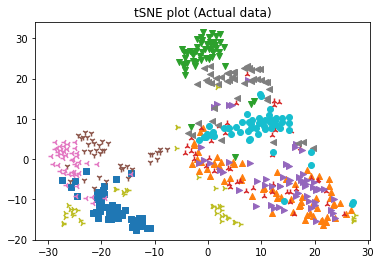

In [99]:
# Main tSNE plot
plt.figure()
plt.title("tSNE plot (Actual data)")
for y_c in y_dct:
    x_d = np.array(y_dct[y_c])    # Data points
    plt.scatter(x_d[:, 0], x_d[:, 1], marker=y_m[y_c])
plt.show()

---

# Part 2: Agglomerative Hierarchical clustering on Fashion-MNIST dataset

In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset. You can use [scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) for this.

1. Visualize a dendrogram and find out the optimal number of clusters with the help of Dendrogram. Explain the procedure.

2. Implement Hierarchical clustering using
    1. Single linkage
    2. Complete linkage

3. Visualize the clusters obtained using these linkages and compare the results

In [ ]:
# Clustering


In [ ]:
#visualize a dendrogram

def dendrogram():
    pass
 

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: </br>
</br>
</br>
</br>





In [ ]:
#visualisation of clusters using single linkage and complete linkage



**Question:** Mention the differences observed using single and complete linkage:

Answer: </br>
</br>
</br>
</br>